<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day10_11_ConceptDrift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

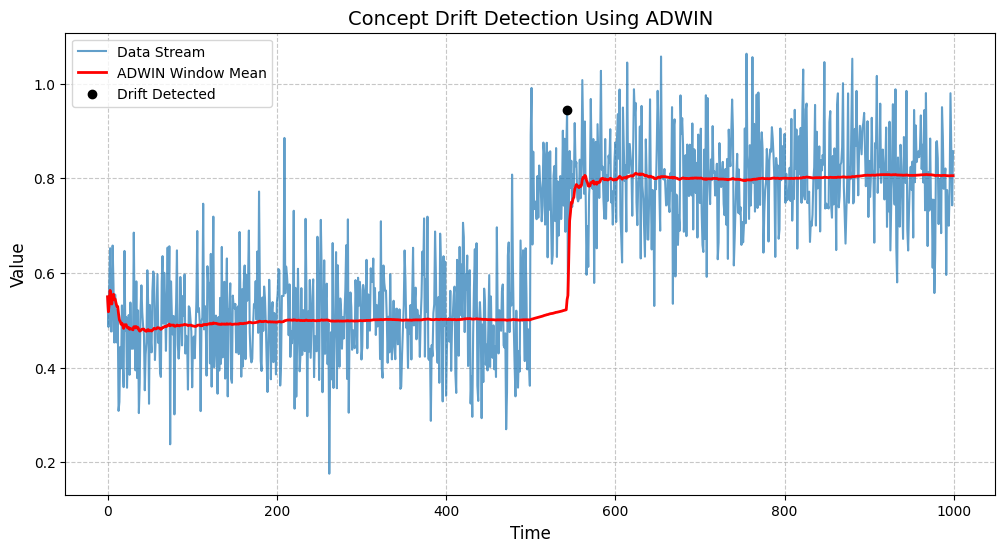

In [3]:
from river.drift import ADWIN
import numpy as np
import matplotlib.pyplot as plt

# Simulate a data stream with concept drift
np.random.seed(42)
stream = np.concatenate([
    np.random.normal(0.5, 0.1, 500),  # First stable period
    np.random.normal(0.8, 0.1, 500)   # After concept drift
])

# Initialize ADWIN
adwin = ADWIN()

# Track results
drift_detected = []
window_means = []

# Process the data stream
for i, value in enumerate(stream):
    adwin.update(value)
    window_means.append(adwin.estimation)
    if adwin.drift_detected:
        drift_detected.append(i)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stream, label="Data Stream", alpha=0.7)
plt.plot(window_means, label="ADWIN Window Mean", color="red", linewidth=2)
plt.scatter(drift_detected, [stream[i] for i in drift_detected], color="black", label="Drift Detected", zorder=5)
plt.title("Concept Drift Detection Using ADWIN", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 - 10s - 22ms/step - accuracy: 0.9251 - loss: 0.2474 - val_accuracy: 0.9676 - val_loss: 0.1059
Epoch 2/10
469/469 - 11s - 24ms/step - accuracy: 0.9685 - loss: 0.1016 - val_accuracy: 0.9759 - val_loss: 0.0753
Epoch 3/10
469/469 - 9s - 20ms/step - accuracy: 0.9775 - loss: 0.0715 - val_accuracy: 0.9770 - val_loss: 0.0725
Epoch 4/10
469/469 - 8s - 17ms/step - accuracy: 0.9815 - loss: 0.0578 - val_accuracy: 0.9787 - val_loss: 0.0687
Epoch 5/10
469/469 - 12s - 25ms/step - accuracy: 0.9855 - loss: 0.0443 - val_accuracy: 0.9789 - val_loss: 0.0736
Epoch 6/10
469/469 - 10s - 21ms/step - accuracy: 0.9868 - loss: 0.0396 - val_accuracy: 0.9802 - val_loss: 0.0744
Epoch 7/10
469/469 - 8s - 18ms/step - accuracy: 0.9875 - loss: 0.0370 - val_accuracy: 0.9838 - val_loss: 0.0573
Epoch 8/10
469/469 - 10s - 22ms/step - accuracy: 0.9904 - loss: 0.0284 - val_accuracy: 0.9799 - val_loss: 0.0724
Epoch 9/10
469/469 - 11s - 24ms/step - accuracy: 0.9908 - loss: 0.0266 - val_accuracy: 0.9799 - val

Epoch 1/5
79/79 - 3s - 42ms/step - accuracy: 0.9795 - loss: 0.0739 - val_accuracy: 0.9947 - val_loss: 0.0184
Epoch 2/5
79/79 - 2s - 30ms/step - accuracy: 0.9891 - loss: 0.0340 - val_accuracy: 0.9977 - val_loss: 0.0081
Epoch 3/5
79/79 - 2s - 28ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 4/5
79/79 - 3s - 40ms/step - accuracy: 0.9954 - loss: 0.0159 - val_accuracy: 0.9983 - val_loss: 0.0053
Epoch 5/5
79/79 - 4s - 49ms/step - accuracy: 0.9963 - loss: 0.0106 - val_accuracy: 0.9997 - val_loss: 0.0014


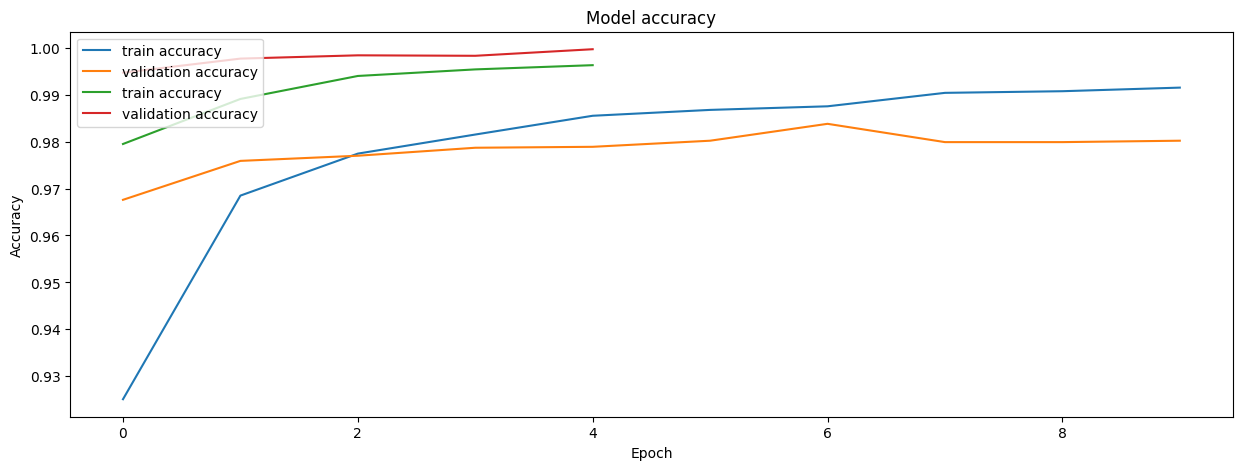

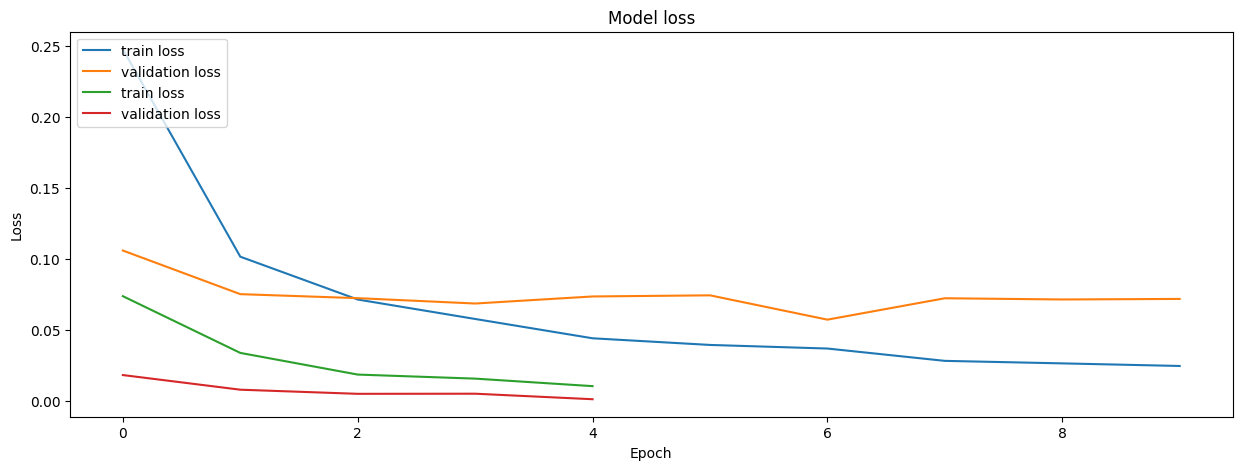

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

# Convert class vectors to binary class matrices
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train model
model = create_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=2)

# Save the model
model.save('mnist_model.h5')

# Assume new_data_x and new_data_y are new data points that come in later
# For demonstration, I'm using x_test and y_test as new data
new_data_x, new_data_y = x_test, y_test

model = load_model('mnist_model.h5')
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
new_history = model.fit(new_data_x, new_data_y, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=2)
model.save('mnist_model.h5')

# Plotting
def plot_history(histories):
    plt.figure(figsize=(15, 5))
    for history in histories:
        plt.plot(history.history['accuracy'], label='train accuracy')
        plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    plt.figure(figsize=(15, 5))
    for history in histories:
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

plot_history([history, new_history])


In [2]:
pip install river

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
gensim 4.3.3 requires scipy